In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
!pip install ctgan
!pip install table_evaluator

     |████████████████████████████████| 45 kB 3.3 MB/s 
     |████████████████████████████████| 280 kB 15.3 MB/s 
     |████████████████████████████████| 636 kB 51.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 285 kB 12.8 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [2]:
os.chdir('drive/MyDrive/William_2022/DATASETS/trans_encoder_2')

# Preparing CSV

In [ ]:
!ls

block_new.py	eeg_transformer.ipynb  main.py		       optim_new.py
config.py	FocalLoss.py	       model_new.py	       roc_new.py
dataset_new.py	jielin_test_all.csv    normalized_eeg_emotion  sublayer_new.py


In [ ]:
os.chdir('../')

In [ ]:
# --- concat all eeg

df = pd.DataFrame()
path = os.listdir('normalized_eeg_emotion')
for csv in path:
  if '.csv' in csv:
    
    #print(csv)
    
    read = pd.read_csv(f'normalized_eeg_emotion/{csv}')
    df = df.append(read)


In [ ]:
path = os.listdir('normalized_eeg_emotion')
count = 0
for csv in path:
  if '.csv' in csv:
    read = pd.read_csv(f'normalized_eeg_emotion/{csv}')
    length = len(read)
    count+=length

In [ ]:
!ls

block_new.py	eeg_transformer.ipynb  model_new.py	       roc_new.py
config.py	FocalLoss.py	       normalized_eeg_emotion  sublayer_new.py
dataset_new.py	main.py		       optim_new.py	       test_all.csv


In [ ]:
df.to_csv('normalized_eeg_emotion/normeeg_concat.csv',sep=',', index=False)

# Preprocessing

In [3]:
df = pd.read_csv('normalized_eeg_emotion/normeeg_concat.csv')

In [4]:
df['arousal'] = df['arousal'].round()
df['valence'] = df['valence'].round()

df['happy'] = df['happy'].round()
df['angry'] = df['angry'].round()

df['nervous'] = df['nervous'].round()
df['sad'] = df['sad'].round()

In [7]:
df[['arousal', 'valence', 'happy', 'angry', 'nervous', 'sad']] = df[['arousal', 'valence', 'happy', 'angry', 'nervous', 'sad']].astype(int)

In [13]:
df

,delta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,middleGamma,theta,arousal,valence,happy,angry,nervous,sad
0,-0.827,-0.512,-0.622,-0.504,-0.128,-0.100,-0.678,0.019,1,3,2,1,1,1
1,-0.239,-0.388,-0.818,-0.559,-0.543,-0.595,-0.274,-1.254,2,3,2,1,1,1
2,-0.815,-0.863,-0.997,-0.761,-0.581,-0.428,0.334,-1.033,2,3,1,1,1,1
3,0.529,-0.416,-0.518,-0.344,-0.167,0.061,-0.092,0.368,2,3,1,1,1,1
4,-0.124,0.541,-0.794,-0.091,-0.079,0.292,-0.845,0.134,2,3,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391,0.189,-0.297,-0.924,-0.906,3.410,0.923,-0.408,-1.240,4,3,1,1,1,1
3392,-0.853,-0.739,-1.138,-1.218,1.501,0.475,-1.681,-1.303,4,3,1,1,1,1
3393,-1.463,-1.460,-1.288,-1.138,0.214,-0.508,-1.340,-1.704,3,3,1,1,1,1
3394,-1.631,-1.431,-1.384,-1.191,-0.072,-0.790,-3.005,-1.903,4,3,1,1,1,1


In [12]:
print(df.columns)

Index(['delta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma',
       'middleGamma', 'theta', 'seconds', 'arousal', 'valence', 'happy',
       'angry', 'nervous', 'sad'],
      dtype='object')


In [12]:
df = df [['delta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma',
       'middleGamma', 'theta', 'arousal', 'valence', 'happy',
       'angry', 'nervous', 'sad']]

In [9]:
cont_features = ['delta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta', 'lowGamma',
       'middleGamma', 'theta']

In [10]:
disc_features = ['arousal', 'valence', 'happy', 'angry', 'nervous', 'sad']

In [14]:
from ctgan import CTGANSynthesizer

ctgan = CTGANSynthesizer(verbose = True)
ctgan.fit(df, disc_features, epochs = 300)

/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:282:

Epoch 1, Loss G:  1.2388,Loss D: -0.1214
Epoch 2, Loss G:  1.1411,Loss D: -0.2749
Epoch 3, Loss G:  1.0232,Loss D: -0.4586
Epoch 4, Loss G:  0.6468,Loss D: -0.4463
Epoch 5, Loss G:  0.1897,Loss D: -0.0796
Epoch 6, Loss G:  0.2495,Loss D: -0.0433
Epoch 7, Loss G:  0.0865,Loss D: -0.0381
Epoch 8, Loss G:  0.2683,Loss D:  0.1286
Epoch 9, Loss G:  0.0980,Loss D:  0.3161
Epoch 10, Loss G:  0.0396,Loss D:  0.1675
Epoch 11, Loss G:  0.2632,Loss D: -0.0383
Epoch 12, Loss G:  0.4350,Loss D: -0.0012
Epoch 13, Loss G:  0.2684,Loss D:  0.0257
Epoch 14, Loss G:  0.2488,Loss D:  0.0653
Epoch 15, Loss G:  0.3211,Loss D: -0.0437
Epoch 16, Loss G:  0.1056,Loss D:  0.1555
Epoch 17, Loss G: -0.0494,Loss D:  0.2344
Epoch 18, Loss G: -0.1890,Loss D:  0.1901
Epoch 19, Loss G: -0.2519,Loss D:  0.0381
Epoch 20, Loss G: -0.0315,Loss D: -0.2261
Epoch 21, Loss G: -0.0824,Loss D: -0.0528
Epoch 22, Loss G: -0.2638,Loss D:  0.0276
Epoch 23, Loss G: -0.5971,Loss D:  0.1044
Epoch 24, Loss G: -0.4015,Loss D: -0.0166
E

In [48]:
samples = ctgan.sample(450000)
print(samples.head())

      delta  lowAlpha  highAlpha   lowBeta  highBeta  lowGamma  middleGamma  \
0 -1.685797 -1.384127  -1.636734 -1.289768 -0.775740 -1.249012    -2.489812   
1  0.535830 -1.384356   0.313268 -1.287191  1.667224 -0.609436    -1.674181   
2  0.702465 -1.130302  -1.525512 -1.390193  0.980021  0.660148    -0.412228   
3 -1.003111  0.343009  -1.403351 -1.391534  0.176969 -0.767102     1.023403   
4 -1.391556  0.434451  -1.229644 -1.261993  8.574384 -0.337586     0.837509   

      theta  arousal  valence  happy  angry  nervous  sad  
0 -1.973698        4        3      1      2        1    2  
1 -1.388687        4        4      1      1        2    1  
2 -0.773848        3        2      1      1        2    1  
3 -0.851418        3        2      1      1        1    1  
4 -1.228388        2        4      1      1        3    1  


(3396, 14) (450000, 14)


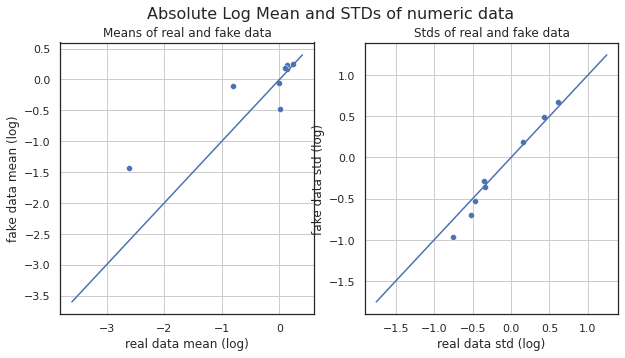

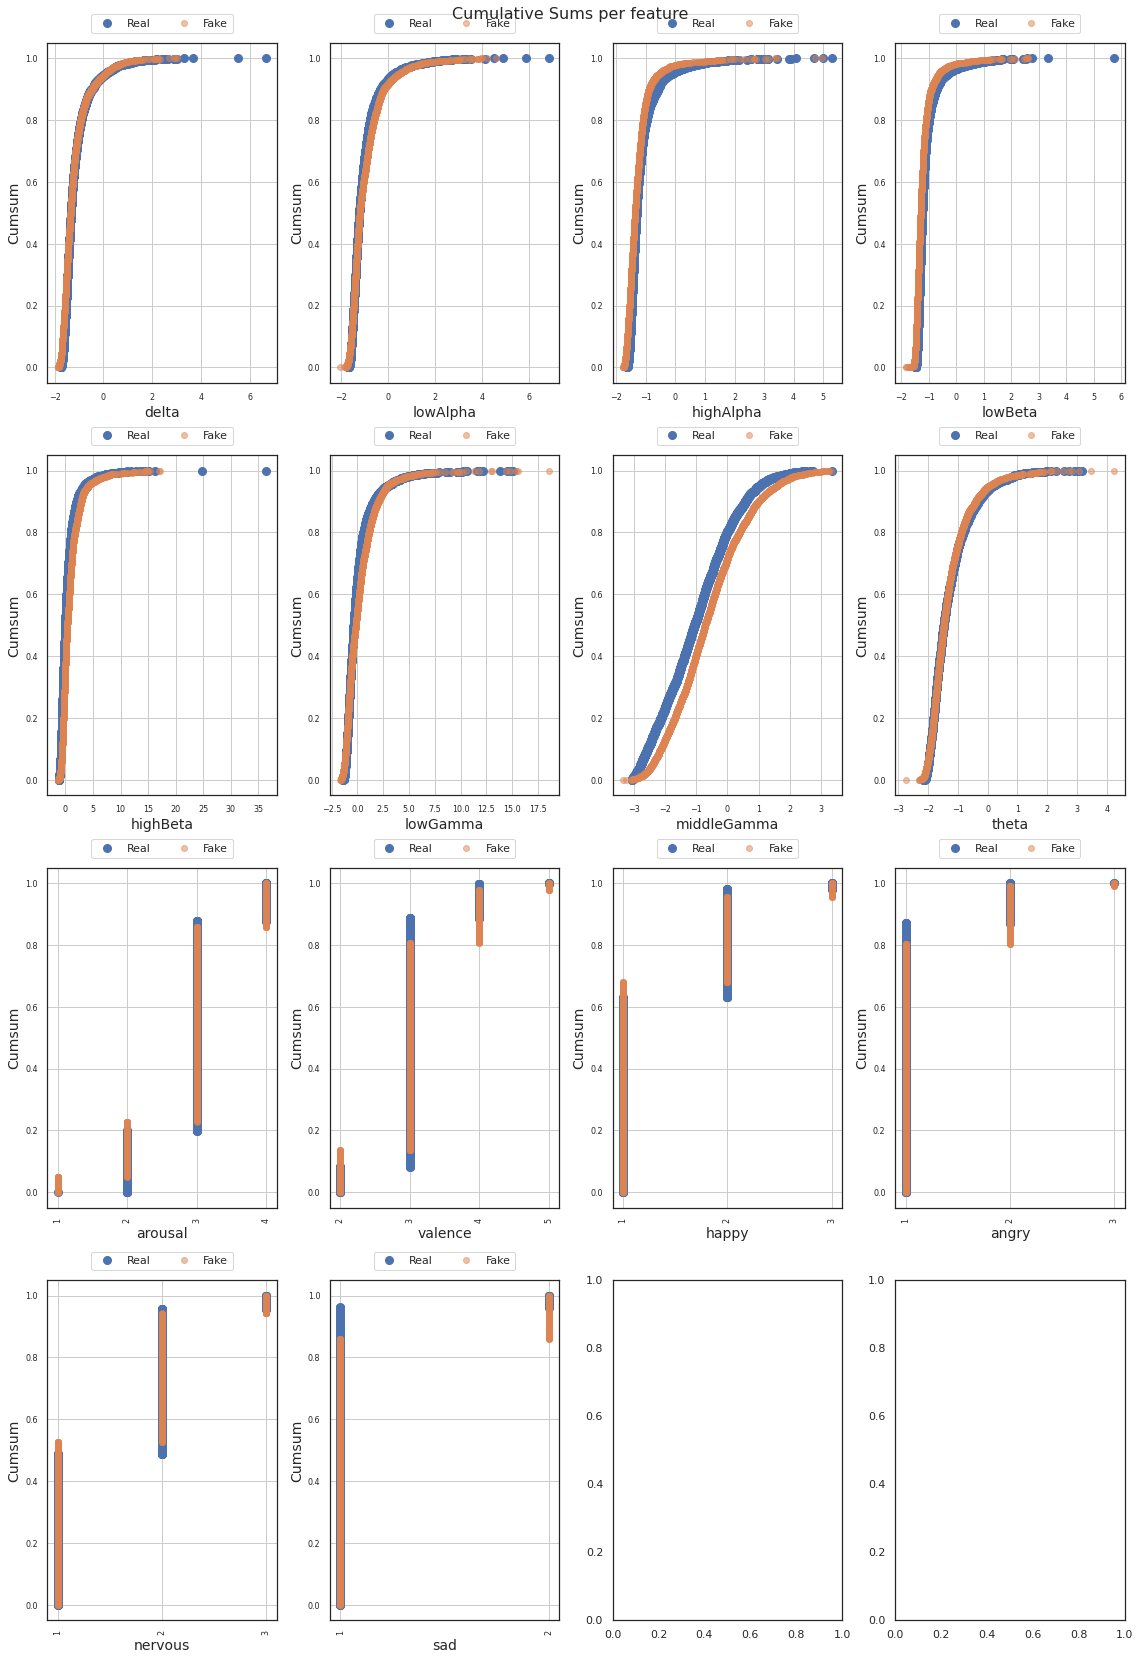

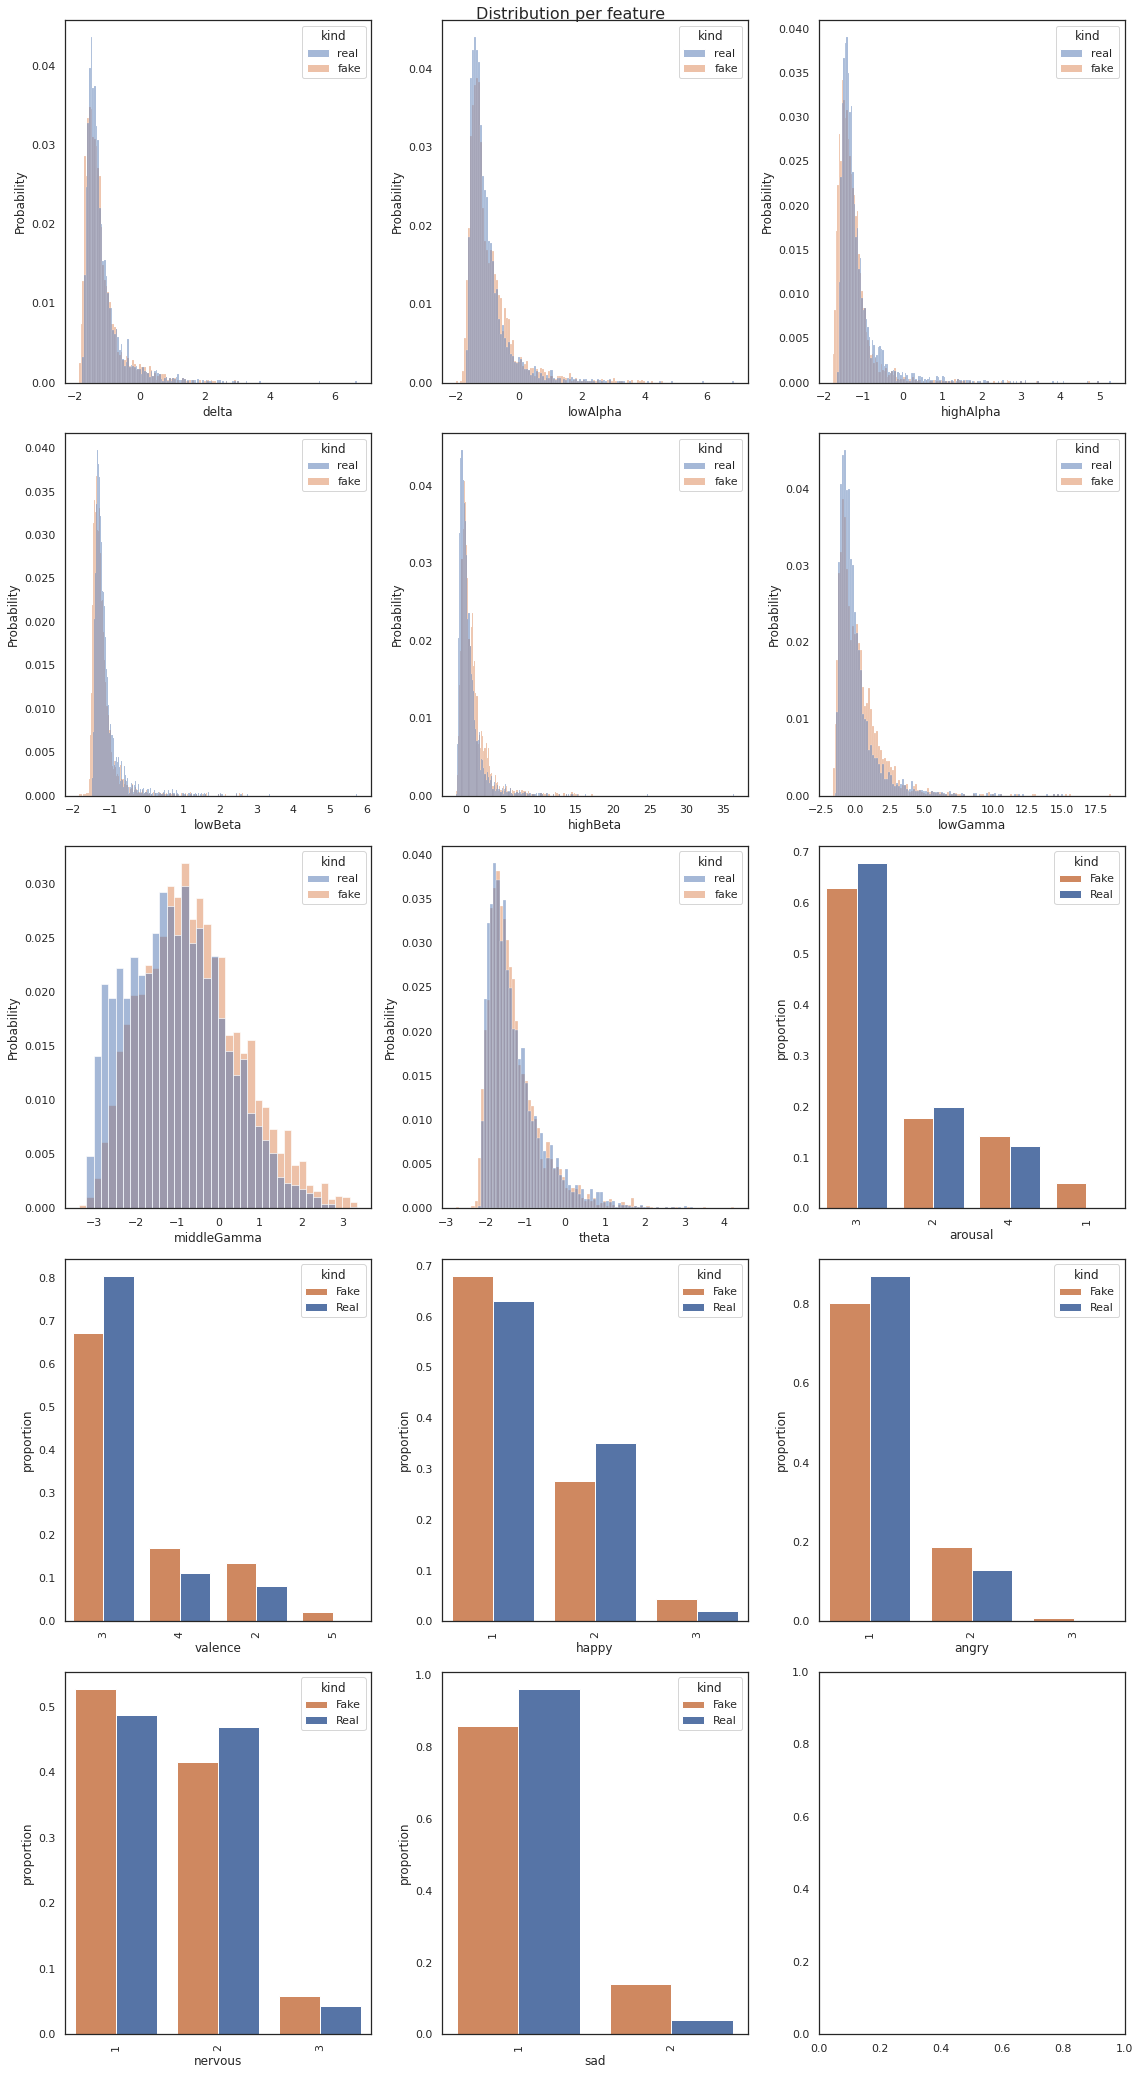

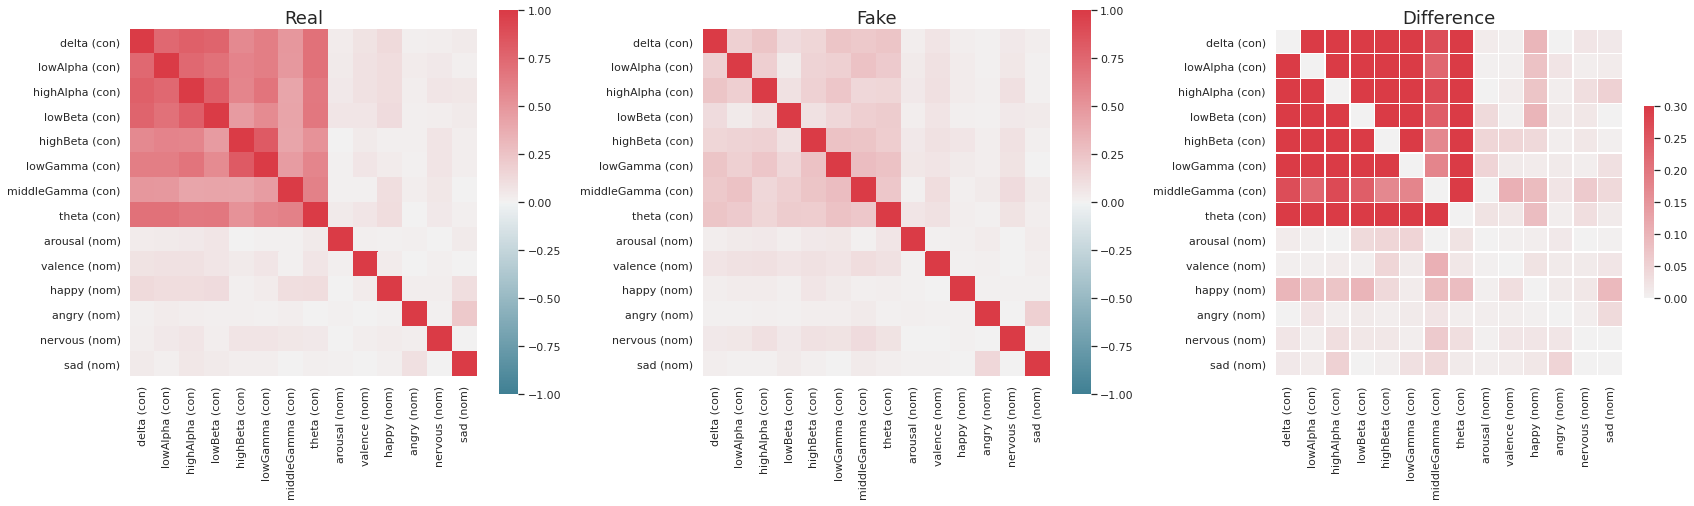

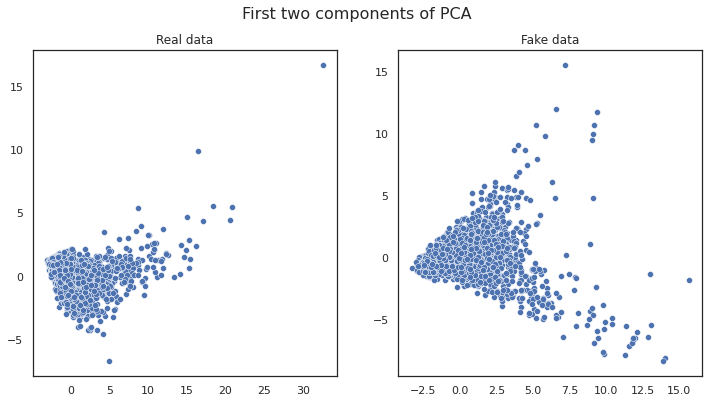

In [49]:
from table_evaluator import load_data, TableEvaluator

print(df.shape, samples.shape)
table_evaluator =  TableEvaluator(df, samples, cat_cols= disc_features)

table_evaluator.visual_evaluation()

In [98]:
gen_data = pd.DataFrame(samples)
gen_data.to_csv('GAN_eeg.csv',sep=',', index=False)

In [51]:
print(df['arousal'].value_counts())
print(gen_data['arousal'].value_counts())

print(df['valence'].value_counts())
print(gen_data['valence'].value_counts())

print(df['happy'].value_counts())
print(gen_data['happy'].value_counts())

print(df['angry'].value_counts())
print(gen_data['angry'].value_counts())

print(df['nervous'].value_counts())
print(gen_data['nervous'].value_counts())

print(df['sad'].value_counts())
print(gen_data['sad'].value_counts())


3    2303
2     676
4     416
1       1
Name: arousal, dtype: int64
3    280068
2     81032
4     65240
1     23660
Name: arousal, dtype: int64
3    2729
4     380
2     281
5       6
Name: valence, dtype: int64
3    300147
4     78872
2     62628
5      8353
Name: valence, dtype: int64
1    2139
2    1190
3      67
Name: happy, dtype: int64
1    307290
2    123454
3     19256
Name: happy, dtype: int64
1    2955
2     439
3       2
Name: angry, dtype: int64
1    357695
2     89048
3      3257
Name: angry, dtype: int64
1    1656
2    1591
3     149
Name: nervous, dtype: int64
1    239000
2    187539
3     23461
Name: nervous, dtype: int64
1    3265
2     131
Name: sad, dtype: int64
1    387533
2     62467
Name: sad, dtype: int64


In [93]:
# --- arousal
newdf = pd.DataFrame()
emotion = 'arousal'
length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 2])
samples_emotion = gen_data.loc[gen_data[emotion] == 2]
df1 = samples_emotion.iloc[0:length-length2]
newdf = newdf.append(df1)

emotion = 'arousal'
length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 4])
samples_emotion = gen_data.loc[gen_data[emotion] == 4]
df1 = samples_emotion.iloc[0:length-length2]

newdf = newdf.append(df1)

emotion = 'arousal'
length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 1])
samples_emotion = gen_data.loc[gen_data[emotion] == 1]
df1 = samples_emotion.iloc[0:length-length2]

newdf = newdf.append(df1)

In [96]:
newdf['happy'].value_counts()

1    3847
2    1610
3     359
Name: happy, dtype: int64

In [90]:
# --- valence
emotion = 'valence'
length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 4])
samples_emotion = gen_data.loc[gen_data[emotion] == 4]
df1 = samples_emotion.iloc[0:length-length2]
newdf = newdf.append(df1)


length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 2])
samples_emotion = gen_data.loc[gen_data[emotion] == 2]
df1 = samples_emotion.iloc[0:length-length2]

newdf = newdf.append(df1)


length = len(df.loc[df[emotion] == 3])
length2 = len(df.loc[df[emotion] == 5])
samples_emotion = gen_data.loc[gen_data[emotion] == 5]
df1 = samples_emotion.iloc[0:length-length2]

newdf = newdf.append(df1)

In [92]:
newdf['happy'].value_counts()

1    8725
2    3490
3    1121
Name: happy, dtype: int64

# Happy

In [ ]:
# --- happy

df1 = df[['happy', 'delta', 'lowAlpha', 'highAlpha',	'lowBeta',	'highBeta',	'lowGamma',	'middleGamma',	'theta'	]]
df1

,happy,delta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,middleGamma,theta
0,2.0,-0.827,-0.512,-0.622,-0.504,-0.128,-0.100,-0.678,0.019
1,2.0,-0.239,-0.388,-0.818,-0.559,-0.543,-0.595,-0.274,-1.254
2,1.0,-0.815,-0.863,-0.997,-0.761,-0.581,-0.428,0.334,-1.033
3,1.0,0.529,-0.416,-0.518,-0.344,-0.167,0.061,-0.092,0.368
4,1.0,-0.124,0.541,-0.794,-0.091,-0.079,0.292,-0.845,0.134
...,...,...,...,...,...,...,...,...,...
3391,1.0,0.189,-0.297,-0.924,-0.906,3.410,0.923,-0.408,-1.240
3392,1.0,-0.853,-0.739,-1.138,-1.218,1.501,0.475,-1.681,-1.303
3393,1.0,-1.463,-1.460,-1.288,-1.138,0.214,-0.508,-1.340,-1.704
3394,1.0,-1.631,-1.431,-1.384,-1.191,-0.072,-0.790,-3.005,-1.903


In [ ]:
X= df1.drop('happy', axis = 1)
y = pd.DataFrame(df1['happy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
y_train['happy'].value_counts()

1.0    1693
2.0     969
3.0      54
Name: happy, dtype: int64

In [ ]:
df_train = pd.concat([y_train, X_train], axis = 1)

In [ ]:
df_train = df_train.reset_index()

In [ ]:
df_train = df_train.drop(['index'], axis = 1)

In [ ]:
df_train.to_csv('train_all.csv',sep=',', index=False)

In [ ]:
df_test = pd.concat([y_test, X_test], axis = 1)

In [ ]:
df_test
df_test = df_test.reset_index()
df_test = df_test.drop(['index'], axis = 1)
df_test.to_csv('test_all.csv',sep=',', index=False)

In [ ]:
!python3 main.py

Traceback (most recent call last):
  File "main.py", line 176, in <module>
    random_state=r,stratify=list(whole_data[:, 0]))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py", line 2441, in train_test_split
    train, test = next(cv.split(X=arrays[0], y=stratify))
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py", line 1600, in split
    for train, test in self._iter_indices(X, y, groups):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py", line 1941, in _iter_indices
    "The least populated class in y has only 1"
ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.


In [ ]:
df_train.columns

Index(['happy', 'delta', 'lowAlpha', 'highAlpha', 'lowBeta', 'highBeta',
       'lowGamma', 'middleGamma', 'theta'],
      dtype='object')